# Imports

In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor, StackingClassifier)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.datasets import fetch_california_housing
%config InlineBackend.figure_formats = ['retina']  # or svg
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

# Random Forest
## Initialization

In [8]:
all_seasons_df = pd.read_csv('/Users/johnmetzger/Desktop/Coding/Projects/Project3/all_seasons_df')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(all_seasons_df.drop('WL',axis=1), 
                                                                all_seasons_df.WL,test_size=0.2, random_state=42)

In [10]:
randomforest = RandomForestClassifier(n_estimators=1000)

In [11]:
randomforest.fit(X_train, y_train)


KeyboardInterrupt: 

## Predict

In [17]:
y_predict=randomforest.predict(X_test)

IndexError: list index out of range

In [16]:
randomforest.score(X_test,y_test)

IndexError: list index out of range

## Conf. Matrix

In [35]:
# cm = confusion_matrix(true target, predicted target)

cm = confusion_matrix(y_test,y_predict)
cm

array([[3338, 1319],
       [1257, 3342]])

Text(64.5, 0.5, 'True')

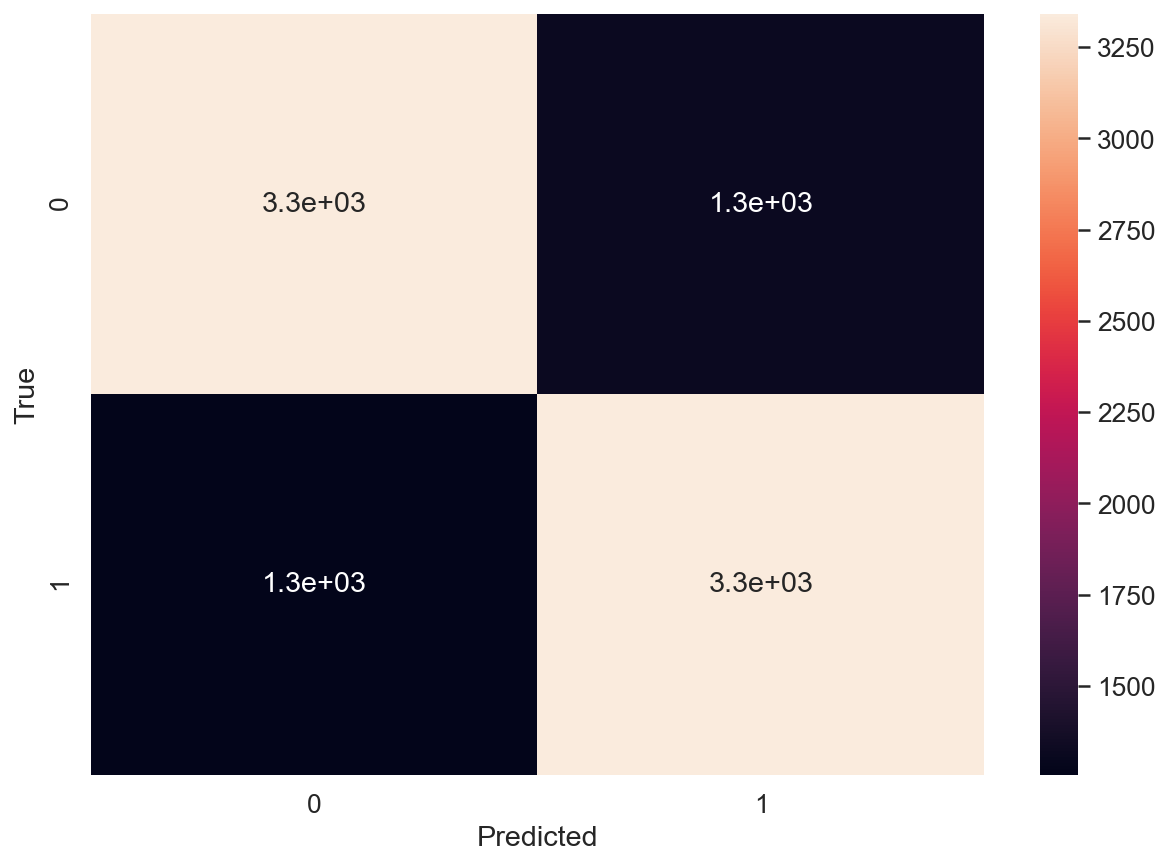

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
# Below is from the Ensemble_Methods_JGM jnb.  It looks like the output
# "VotingClassifier" estimators.  
''''
VotingClassifier(estimators=[('lr_model', LogisticRegression()),
                             ('nb_model', GaussianNB()),
                             ('knn_model', KNeighborsClassifier()),
                             ('svc_model', SVC(probability=True)),
                             ('rf_model', RandomForestClassifier()),
                             ('et_model', ExtraTreesClassifier()),
                             ('ada_model', AdaBoostClassifier())],
                 n_jobs=-1)

'''
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', # <-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

## GridSearch

The hyperparameters are:
1. *n_estimators*
2. *max_depth*
3. *min_samples_split*
4. *min_samples_leaf*


In [53]:
max_depth = [14,16,18]
min_samples_leaf = [7,9,11] 
min_samples_split = [2,5,7]
n_estimators = [100]
'''

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(randomforest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
#This makes bestF your random forest model to do .predict on.
gridF.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=1000),
             n_jobs=-1,
             param_grid={'max_depth': [12, 14, 16, 18],
                         'min_samples_leaf': [7, 9, 11, 13],
                         'min_samples_split': [5], 'n_estimators': [100]},
             verbose=1)

In [ ]:
'''
max_depth = [14,16,18]
min_samples_leaf = [7,9,11] 
min_samples_split = [2,5,7]
n_estimators = [100]
'''

gridF.best_score_

In [ ]:
'''
max_depth = [14,16,18]
min_samples_leaf = [7,9,11] 
min_samples_split = [2,5,7]
n_estimators = [100]
'''

gridF.best_params_

In [59]:
'''
max_depth = [12,14,16,18]
min_samples_leaf = [7,9,11,13] 
min_samples_split = [5]
n_estimators = [100]
'''

gridF.best_score_

0.7207606415408425

In [60]:
'''
max_depth = [12,14,16,18]
min_samples_leaf = [7,9,11,13] 
min_samples_split = [5]
n_estimators = [100]
'''

gridF.best_params_

{'max_depth': 16,
 'min_samples_leaf': 9,
 'min_samples_split': 5,
 'n_estimators': 100}

In [51]:
'''
max_depth = [5,8,10,12,14]
min_samples_leaf = [2,5,7,9] 
min_samples_split = [2,5,7,9]
n_estimators = [100]
'''

gridF.best_score_

0.7212738382303945

In [52]:
'''
max_depth = [5,8,10,12,14]
min_samples_leaf = [2,5,7,9] 
min_samples_split = [2,5,7,9]
n_estimators = [100]

'''
gridF.best_params_

{'max_depth': 14,
 'min_samples_leaf': 9,
 'min_samples_split': 5,
 'n_estimators': 100}

In [48]:
'''
max_depth = [10]
min_samples_leaf = [7] 
min_samples_split = [2]
n_estimators = [10,30,100,500,1000]
'''

gridF.best_score_

0.7211928206527713

In [49]:
'''
max_depth = [10]
min_samples_leaf = [7] 
min_samples_split = [2]
n_estimators = [10,30,100,500,1000]
'''

gridF.best_params_

{'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [45]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [2,5,7,9] 
min_samples_split = [2,5,7,9]
n_estimators = [100]
'''

gridF.best_score_

0.7218681115961427

In [46]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [5] 
min_samples_split = [2,5]
n_estimators = [100]
 '''


gridF.best_params_

{'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [5] 
min_samples_split = [2,5]
n_estimators = [100]
 '''


gridF.best_score_

0.7220301139188479

In [43]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [2,5,7,9] 
min_samples_split = [2,5,7,9]
n_estimators = [100]
'''
gridF.best_params_

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [38]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [5]
min_samples_split = [2]
n_estimators = [100]
''' 

gridF.best_score_

0.7203014324925094

In [39]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [5]
min_samples_split = [2]
n_estimators = [100]
''' 



gridF.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

### Best Hyperparameters

Note: not all combinations were tested all at once.
**Also Note: Run this overnight to double check that piecemeal agrees**

Range tested:
* max_depth = [5,8,10,12]
* min_samples_leaf = [2,5,7,9] 
* min_samples_split = [2,5,7,9]
* n_estimators = [10,30,100,500,1000]


In [ ]:
max_depth = 10
min_samples_leaf = [2,5,7,9] 
min_samples_split = [2,5,7,9]
n_estimators = [10,30,100,500,1000]

## ROC-AUC

**MAKE ROCAUC curve for all 3 models**

'The higher the AUC, the better the performance of the model at distinguishing between the positive 
and negative classes."

"AUC-ROC curve is only for binary classification problems."
-https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/


In [58]:
# 
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = randomforest.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

IndexError: list index out of range

In [56]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 


fpr, tpr, thresholds = roc_curve(y_test, randomforest.predict_proba(X_test)[:,1])

NameError: name 'roc_curve' is not defined

In [ ]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: Predict NBA Winner at Halftime');
print("ROC AUC score = ", roc_auc_score(y_test, randomforest.predict_proba(X_test)[:,1]))

In [ ]:

# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, randomforest.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [ ]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");